In [1]:
import pandas as pd
import random as rd
import numpy as np
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
import numpy as np
from rdkit import Chem
from rdkit import DataStructs

import math
import collections
import matplotlib.pyplot as plt

RDKit WARNING: [09:28:41] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:


dataset1  = pd.read_csv("dataset1.csv",sep=",", index_col=0)
dataset1 = dataset1.iloc[:,1:]
dataset1

,mol_smiles,mol_act,mol_fp
0,C=C1C(=O)N[C@H](C)C(=O)N[C@@H](CC(C)C)C(=O)N[C...,0.00010,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1,COC[C@@H]([C@H](O)[C@H](O)C(=O)NCC[C@H](C)c1nc...,0.00030,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
2,C/C=C1/C(=O)N[C@@H](C(=O)O)[C@H](C)C(=O)N[C@@H...,0.00042,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
3,COC[C@@H]([C@H](O)[C@H](O)C(=O)NCC[C@H](C)c1nc...,0.00050,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
4,CO[C@H]([C@H](O)CC(=O)[C@@H](C)[C@@H](O)CC[C@@...,0.00067,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
...,...,...,...
1847,Cc1ccc2c(c1)/C(=C\c1ccc(CN3C(=O)C(=O)c4ccccc43...,9.82000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1848,COc1ccc(C(=O)/C=C/c2cc(Br)c(O)cc2OC)cc1,9.90000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1849,C/C(=C\CCc1ccoc1)C[C@H](O)C[C@@H](C)CCCc1ccoc1,9.90000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1850,COc1cc(Cl)c(CNC(=O)NCc2cccc([N+](=O)[O-])c2)c(...,9.91000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...


## SIDE PROGRAM

In [3]:
dataset = pd.read_csv("dfProb.csv",sep=",", index_col=0)
dataset = dataset.iloc[:,1:]
dataset

,mol_smiles,mol_act,mol_fp,mol_prob
0,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,0.7200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.486752
1,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,3.3100,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.036516
2,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,5.0501,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.006409
3,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.5400,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.582748
4,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.6200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.537944
...,...,...,...,...
1447,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,5.2000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.005517
1448,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,5.5000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.004087
1449,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,0.7200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.486752
1450,CCCc1cc(O)cc(O)c1C(=O)O,1.5800,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.205975


### handling duplikat individu

In [4]:
# duplikat antar 2 individu
def dupIndividu(ind1,ind2):
    countSame = 0
    for i in ind1 :
        if i in ind2:
            countSame += 1
    
    if countSame == len(ind1) :
        return True
    else :
        return False

# duplikat individu dalam populasi

def isDupInd(population):
    check = False
    n = len(population)
    for i in range(n) :
        for j in range(n) :
            if i > j :
                if dupIndividu(population[i],population[j]) :
                    print(population[i],population[j])
                    check = True
                    break
    return check

In [5]:
def initPopulation(nPortfolio,nPopulation,dataset=dataset) :

    def initIndividu(dataset = dataset,nPortfolio = nPortfolio) :
        newIndividu = []
        while(len(newIndividu) < nPortfolio) :
            mol = rd.randint(0,len(dataset)-1)
            if mol not in newIndividu  :
                newIndividu.append(mol)
        return newIndividu
    
    ind = initIndividu()
    #print(ind)
    newPopulation=[ind]
    while(len(newPopulation) < nPopulation) :
        ind = initIndividu()
        #print(ind)
        newPopulation.append(ind)
        if not isDupInd(newPopulation) :
            newPopulation[:len(newPopulation)-1]
    return newPopulation

### Fitness function

In [6]:
def dominanceTest(sol1,sol2) :
    count = 0
    dominance = False

    # 2 fungsi
    for i in range(2) :
        if sol1[i] <= sol2[i] :
            count += 1    
    if count == 2 :
        dominance = True
    return dominance

In [7]:
# input = [func1,func2]
def strengthFitness(population) :
    n = len(population)
    strength = list(np.zeros(n))
    for i in range(n) :
        for j in range(n) :
            if i != j :
                if dominanceTest(population[i],population[j]) :
                    strength[i] += 1
    return strength



In [8]:
def rawFitness(strength) :
    n = len(strength)
    raw = list(np.zeros(n))

    for i in range(n) :
        for j in range(n) :
            if i != j :
                raw[i] += strength[j]
    return raw
                

In [9]:
def euclideanDistance(sol1,sol2) :
    x = (sol1[0]-sol2[0])**2
    y = (sol1[1]-sol2[1])**2
    z = np.sqrt(x+y)
    return z

In [10]:
euclideanDistance([0,12],[0,3])

9.0

In [11]:
def densityFitness(population) :
    n = len(population)
    k = round(np.sqrt(n),0)
    density = list(np.zeros(n))

    for i in range(n) :
        dist =euclideanDistance(population[i],population[k])
        density[i] = 1/(dist+2)
    
    return density



In [12]:
def fitnessFunction(population) :

    # F(i)
    def rawFitness(population = population) :

        # S(i)
        def strengthFitness(population = population) :
            n = len(population)
            strength = list(np.zeros(n))
            for i in range(n) :
                for j in range(n) :
                    if i != j :
                        if dominanceTest(population[i],population[j]) :
                            strength[i] += 1
            return strength

        strength = strengthFitness()
        n = len(strength)
        raw = list(np.zeros(n))

        for i in range(n) :
            for j in range(n) :
                if i != j :
                    raw[i] += strength[j]
        return raw
    
    # D(i)
    def densityFitness(population = population) :
        n = len(population)
        k = int(round(np.sqrt(n),0))
        density = list(np.zeros(n))

        for i in range(n) :
            dist =euclideanDistance(population[i],population[k])
            density[i] = 1/(dist+2)
        
        return density

    rawFit = rawFitness()
    densFit = densityFitness()

    n = len(population)
    fitValue = list(np.zeros(n))
    for i in range(n):
        fitValue[i] = rawFit[i] + densFit[i]
    return fitValue

In [13]:
fitnessFunction(popCombine)

NameError: name 'popCombine' is not defined

In [14]:
ls =[0,2,3,1]
print(np.argsort(ls))

[0 3 1 2]


In [15]:
def sortFitness(population,fitness) :
    sorted = list(np.argsort(fitness))
    sorted.reverse()
    newPop = []
    for i in sorted:
        newPop.append(population[i])
    return newPop



In [16]:
sortFitness(["a","b","c"],[1,5,3])

['b', 'c', 'a']

In [17]:
def funcIndividu(individu,dataset = dataset) :
    molAct = dataset["mol_act"].tolist()
    molSmiles = dataset["mol_smiles"].tolist()
    molProb = []

    """sumAct = 0
    for molekul in molAct :
        act = np.exp(-molekul)
        sumAct  += act

    for molekul in molAct :
        #act = (molekul[1]*p_avg*n)/sum_act
        act = np.exp(-molekul)
        prob = act/sumAct
        prob = round(prob,8)
        prob = act
        molProb.append(prob)"""
    molProb = dataset["mol_prob"].tolist()

    def func_1(molProb = molProb, individu = individu) :
        #G = 1000
        CAvg = 5
        nPortfolio = len(individu)
        B = nPortfolio*CAvg
        G = nPortfolio * 100000

        actList = []
        for mol in individu :
            #print(mol)
            actList.append(molProb[mol]*G)
        return np.sum(actList) - B
        #return expReturn
    
    def func_2(molSmiles = molSmiles ,individu = individu):
        molFp = []
        for mol in individu :
            smiles = Chem.MolFromSmiles(str(molSmiles[mol]))
            fp = Chem.RDKFingerprint(smiles)
            molFp.append(fp)
        n = len(molFp)
        sumDiverse = 0
        divLs = np.zeros([n,n])
        #print(n)
        for i in range(n):
                # Update code
            for j in range(n):
                simT = DataStructs.FingerprintSimilarity(molFp[i],molFp[j])
                dx = 1 - simT
                tetha = 0.5
                fx = np.exp((-1)*tetha*dx)
                #fx = round(fx,2)
                divLs[i][j] = fx
        
        #handle determinan = 0
        handleDet = 0.0000001
        countDet = 1
        sameCorr = []
        for i in range(n) :
            for j in range(n) :
                if i > j :

                    if divLs[i][j] in sameCorr :
                        #print(divLs[i][j])
                        a = divLs[i][j] - (divLs[i][j]*countDet*handleDet)
                        #print(divLs[i][j],a)
                        divLs[i][j] = a
                        divLs[j][i] = a
                        countDet += 1
                    else :
                        sameCorr.append(divLs[i][j])


        e = np.ones(n)
        eT = np.transpose(e)
        divLsInv = np.linalg.inv(divLs)
        sumDiverse = e.dot(divLsInv).dot(eT)

        return sumDiverse

    return individu,[func_1(),func_2()]

In [18]:
def funcPopulation(population) :
    n = len(population)

    individu = []
    func = []

    for i in range(n) :
        x = funcIndividu(population[i])
        individu.append(x[0])
        func.append(x[1])
    return individu,func

In [19]:
print(fitness)

NameError: name 'fitness' is not defined

In [20]:
def rouletteWheel(fitness,population,nPar) :
    sumFitness = np.sum(fitness)
    newFitness = [f/sumFitness for f in fitness]
    sumProb = 0
    n = len(population)
    prob = list(np.zeros(n))
    for i in range(n) :
        sumProb += newFitness[i]
        prob[i] = sumProb
    
    parent = []
    #print(sumProb)
    while(len(parent) < nPar) :
        rand = rd.random()
        #print(rand)
        for j in range(nPar) : 
            if rand >= prob[j] :
                if population[j] not in parent :
                    parent.append(population[j])
                    #print(population[j])

    
    return parent
    
print(fitness)
print(list(popu))
matingPool = rouletteWheel(fitness,popu,5)

NameError: name 'fitness' is not defined

In [21]:
def duplicateInd(individu,population) :
    check = False
    compare = lambda x, y: collections.Counter(x) == collections.Counter(y)

    for ind in population :
        check = compare(ind,individu)
        #print(individu,ind)
        #print(check)
        if check :
            #print("hit")
            break
    return check

In [39]:
def generateOffspring(population,dataset = dataset,pCo = 0.5,pMut=0.1) :
    n = len(population)

    #cek gen yang sama untuk menghindari duplikasi pd crossover
    def duplicateMol(parent) :
        parent1,parent2 = parent
        dupGen = []
        for gen in parent1 :
            if gen in parent2 :
                dupGen.append(gen)
        return dupGen

    # return 1 pasangan parent
    def generateParent(population=population, sizeOfPop = n):
        parent1 = population[rd.randint(0,sizeOfPop-1)]
        parent2 = population[rd.randint(0,sizeOfPop-1)]
        return [parent1,parent2]

    def crossover(parent,pCo = pCo) :
        crosscheck = False
        randCo = rd.random()
        parent1,parent2 = parent
        dupMol = duplicateMol(parent)
        #print(dupMol)

        # pemotongan parent dengan gen yang sama
        
        parent1 = list(set(parent1)-set(dupMol))
        parent2 = list(set(parent2)-set(dupMol))
        nGen = len(parent1)
        
        nPoint = 0.5
        barier = math.floor(nGen*nPoint) 

        if randCo < pCo :
            crosscheck = True
            offspring1 = parent1[:barier]+parent2[barier:]
            offspring2 = parent2[:barier]+parent1[barier:]
        else :
            offspring1 = parent1
            offspring2 = parent2

        offspring1 += dupMol
        offspring2 += dupMol
        return ([offspring1,offspring2]),crosscheck

   # Flip mutation 
    def mutation(individu,pMut = pMut,pMr = 0.5,dataset = dataset) :
        mutcheck = False
        randMut = rd.uniform(0,1)
        newOffspring = []
        if randMut < pMut :
            mutcheck = True
            newInd = []
            molIdx = [mol for mol in range(len(dataset)-1) if mol not in individu]
            for idx,gen in enumerate(individu) :
                randRep = rd.uniform(0,1)
                if randRep > pMr :
                    newMol = rd.choice(molIdx)
                    while(newMol in individu) :
                        individu[idx] = rd.choice(molIdx)

        return individu,mutcheck



    
    # Start Generate
    """solution = []
    l = 0
    while(len(solution) < n+1):
        #print(len(solution))
        parents = generateParent()
        #print(parents)
        offSpring = crossover(parents)
        #print(offSpring)
        for x in offSpring :
            if len(solution) == 0 :
                solution.append(mutation(x))
            elif len(solution) < n+1 :
                solution.append(mutation(x))
                if not (duplicateInd(x,solution)):
                    solution.append(mutation(x))
                else :
                    continue
        l+=1
        """
    solution = []
    for i in range(len(population)) :
        parents = generateParent()
        offspring,cek = crossover(parents)
        for x in offspring :
            if cek :
                solution.append(mutation(x)[0])
            elif mutation(x)[1] :
                solution.append(mutation(x)[0])
    return solution


In [40]:
generateOffspring(population)

[[1360, 785, 1302, 1335, 1389],
 [176, 434, 1256, 1433, 446],
 [1344, 1011, 1236, 970, 1229],
 [67, 522, 647, 1241, 215],
 [773, 582, 1421, 1294, 783],
 [954, 939, 117, 1131, 397],
 [336, 644, 1317, 251, 126],
 [512, 928, 296, 778, 222],
 [768, 259, 486, 1208, 889],
 [692, 1365, 1270, 332, 542],
 [482, 3, 1175, 379, 46],
 [179, 647, 1284, 1093, 489],
 [112, 661, 39, 875, 927],
 [576, 356, 1431, 1002, 494],
 [1393, 1235, 661, 89, 957],
 [1264, 132, 1095, 1145, 287],
 [561, 1219, 742, 568, 1161],
 [387, 52, 181, 426, 318],
 [1014, 1000, 658, 71, 1400],
 [760, 1026, 668, 1086, 191],
 [450, 211, 1317, 251, 126],
 [512, 928, 518, 87, 185],
 [1360, 785, 312, 570, 540],
 [835, 1077, 1256, 1433, 446],
 [307, 691, 1347, 790, 407],
 [1361, 34, 1204, 1114, 875],
 [678, 743, 1421, 1294, 783],
 [954, 939, 488, 941, 382],
 [1073, 637, 117, 1131, 397],
 [773, 582, 857, 77, 814],
 [1361, 34, 780, 1229, 1327],
 [801, 1394, 1347, 790, 407],
 [450, 211, 1273, 746, 14],
 [1312, 529, 518, 87, 185],
 [1060,

In [30]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

a=[1,2,3]
b =[1,2]
print(Diff(a,b))

[3]


In [31]:
funcPopulation(population)

NameError: name 'population' is not defined

## MAIN PROGRAM

gen ke- 0
gen ke- 1
gen ke- 2
gen ke- 3
gen ke- 4
gen ke- 5
gen ke- 6
gen ke- 7
gen ke- 8
gen ke- 9
gen ke- 10
gen ke- 11
gen ke- 12
gen ke- 13
gen ke- 14
gen ke- 15
gen ke- 16
gen ke- 17
gen ke- 18
gen ke- 19
gen ke- 20
gen ke- 21
gen ke- 22
gen ke- 23
gen ke- 24
gen ke- 25
gen ke- 26
gen ke- 27
gen ke- 28
gen ke- 29
gen ke- 30
gen ke- 31
gen ke- 32
gen ke- 33
gen ke- 34
gen ke- 35
gen ke- 36
gen ke- 37
gen ke- 38
gen ke- 39
gen ke- 40
gen ke- 41
gen ke- 42
gen ke- 43
gen ke- 44
gen ke- 45
gen ke- 46
gen ke- 47
gen ke- 48
gen ke- 49
gen ke- 50
gen ke- 51
gen ke- 52
gen ke- 53
gen ke- 54
gen ke- 55
gen ke- 56
gen ke- 57
gen ke- 58
gen ke- 59
gen ke- 60
gen ke- 61
gen ke- 62
gen ke- 63
gen ke- 64
gen ke- 65
gen ke- 66
gen ke- 67
gen ke- 68
gen ke- 69
gen ke- 70
gen ke- 71
gen ke- 72
gen ke- 73
gen ke- 74
gen ke- 75
gen ke- 76
gen ke- 77
gen ke- 78
gen ke- 79
gen ke- 80
gen ke- 81
gen ke- 82
gen ke- 83
gen ke- 84
gen ke- 85
gen ke- 86
gen ke- 87
gen ke- 88
gen ke- 89
gen ke- 90
gen ke- 9

<function matplotlib.pyplot.show(*args, **kw)>

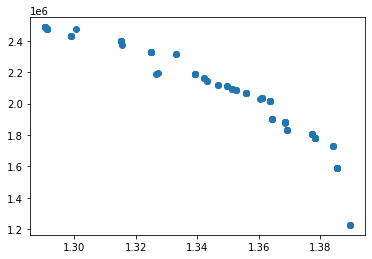

In [46]:
nPop = 100
nMol = 5
nArc = 100
T = 100

t = 0
# step 1 intialization
population = initPopulation(nMol,nPop)
archive = initPopulation(nMol,nArc)

while t < T :
    print("gen ke-",t)
    popCombine = np.vstack([population,archive])
        
    fitness = fitnessFunction(funcPopulation(popCombine)[1])
    #popu = funcPopulation(popCombine)[0]
    #print(popu)
    #print(fitness)
    sortedFitness = sortFitness(popCombine,fitness)
     
    archive = sortedFitness[:nArc]
    population = generateOffspring(sortedFitness[:nPop])

    t+= 1

funcArc = funcPopulation(archive)[1]
xLs = []
yLs = []
for i in funcArc :
    xLs.append(i[0])
    yLs.append(i[1])
#print(xLs)
plt.scatter(yLs,xLs)
plt.show




In [47]:
print(len(yLs))

100


In [50]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front
print(len(fast_non_dominated_sort(yLs,xLs)))

4


In [49]:
funcArc = funcPopulation(archive)[1]
xLs = []
yLs = []
for i in funcArc :
    xLs.append(i[0])
    yLs.append(i[1])
print(xLs)

[2140549.5405577086, 2159831.770344684, 2159831.7703446834, 2117097.805302639, 2013402.7538089482, 2370260.353738838, 1874174.4540540436, 2472404.27122558, 1587542.1920343307, 2140549.5405577086, 2117097.805302639, 2111825.305066147, 2111825.305066147, 2095228.1585418852, 2095228.1585418852, 2188924.89993919, 2188924.89993919, 2088373.5698110773, 2088373.5698110773, 2036854.4890640178, 2036854.4890640178, 2315657.2166238506, 2315657.2166238506, 1881029.042784851, 1881029.042784851, 1831440.4890119988, 1831440.4890119988, 1727745.437518308, 1727745.437518308, 2095228.1585418847, 2088373.5698110773, 2196344.87694857, 2036854.4890640178, 1903267.5836485499, 1903267.5836485499, 1903267.5836485499, 2397482.6213567876, 2397482.6213567876, 2397482.6213567876, 1831440.4890119988, 2485465.642574397, 2485465.642574397, 2485465.642574397, 1782348.5746332952, 1782348.5746332952, 1782348.5746332952, 1727745.437518308, 1587542.1920343305, 1587542.1920343305, 1228492.8777800004, 1228492.8777800004, 1

In [171]:
popLs = []
for i in archive :
    popLs.append(list(i))
#popLs

100


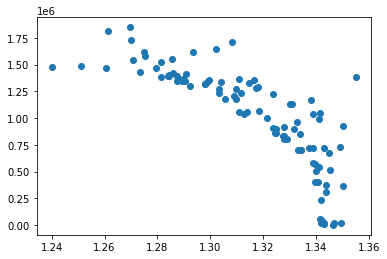

In [208]:
print(len(yLs))
plt.scatter(yLs,xLs)
plt.show()

In [207]:
dfHasil = pd.DataFrame({"X":xLs,"Y":yLs})
dfHasil.to_csv("hasil1000.csv")

In [204]:
nPop = 50
nMol = 5
nArc = 50
T = 500
t=0
while t < T :
    print("gen ke-",t)
    if len(archive) == 0 :
        popCombine = np.vstack([population,archive])
    else :
        popCombine = np.vstack([population,archive])
        
    fitness = fitnessFunction(funcPopulation(popCombine)[1])
    #popu = funcPopulation(popCombine)[0]
    #print(popu)
    #print(fitness)
    sortedFitness = sortFitness(popCombine,fitness)
    archive = sortedFitness[:nArc]
    population = generateOffspring(sortedFitness[nPop:])
    
    
    #print(xLs)
    
    
    t+= 1
funcArc = funcPopulation(archive)[1]
xLs = []
yLs = []
for i in funcArc :
    xLs.append(i[0])
    yLs.append(i[1])
plt.scatter(yLs,xLs)
plt.show

gen ke- 0
gen ke- 1
gen ke- 2


KeyboardInterrupt: 

In [115]:
molAct = dataset["mol_act"].tolist()

sumAct = 0
for molekul in molAct :
    act = np.exp(-molekul)
    sumAct  += act
molProb = []
for molekul in molAct :
    #act = (molekul[1]*p_avg*n)/sum_act
    act = np.exp(-molekul)
    prob = act/sumAct
    prob = round(prob,8)
    prob = act
    molProb.append(prob)

In [141]:
s = np.argsort(xLs)
y = np.min(xLs)
print(y)

print(xLs[s[0]])
print(popLs[s[0]])

2330.5327615287556
2330.5327615287556
[1008, 1362, 1179, 556, 505]


In [117]:
dataset

,mol_smiles,mol_act,mol_fp,mol_prob
0,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,0.7200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.486752
1,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,3.3100,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.036516
2,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,5.0501,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.006409
3,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.5400,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.582748
4,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.6200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.537944
...,...,...,...,...
1447,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,5.2000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.005517
1448,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,5.5000,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.004087
1449,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,0.7200,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.486752
1450,CCCc1cc(O)cc(O)c1C(=O)O,1.5800,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.205975


In [78]:
CAvg = 5
nPortfolio = len(archive[s[0]])
B = nPortfolio*CAvg
G = nPortfolio * 10000
print(G)
print(B)
actList = []
for mol in archive[s[0]] :
    print(molProb[mol])
    actList.append(molProb[mol]*G)
print(actList)
print(np.sum(actList) - B)

50000
25
0.0002248673241788482
2.4039255873760122e-248
0.00012340980408667956
0.00024851682710795185
6.128349505322213e-05
[11.24336620894241, 1.2019627936880062e-243, 6.170490204333978, 12.425841355397592, 3.0641747526611067]
7.903872521335089


In [114]:
funcPopulation(popCombine)[1]

[[16188.953555799177, 1.362283482167658],
 [15616.257124835683, 1.3914674824314486],
 [30959.14135394956, 1.3521988301839194],
 [41844.993088563344, 1.3930467217518463],
 [34052.19904412488, 1.2330485079437494],
 [37323.72815687486, 1.3628421989938988],
 [25233.5840915762, 1.3467582423796634],
 [30776.347062532786, 1.3627323349438853],
 [46054.72281839035, 1.3586954872134571],
 [31102.038782749714, 1.3576288888799246]]

In [14]:
df = pd.read_csv("hasil500.csv", index_col=0)
df

,X,Y
0,8.170414e+05,1.364835
1,9.250053e+05,1.357814
2,1.038169e+06,1.354245
3,1.158043e+06,1.352065
4,1.254391e+06,1.338402
...,...,...
95,1.196673e+06,1.330405
96,1.330266e+06,1.318504
97,1.496137e+06,1.309318
98,1.538617e+06,1.292739


In [15]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

In [16]:
x = df["X"].tolist()
y = df['Y'].tolist()
fast_non_dominated_sort(x,y)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 19, 20],
 [13, 32, 14, 27, 28, 17, 18, 31, 21, 22, 23, 24, 25, 26, 30, 34, 35, 36],
 [29,
  33,
  40,
  51,
  52,
  53,
  65,
  66,
  74,
  75,
  43,
  44,
  45,
  37,
  46,
  69,
  70,
  38,
  71,
  48,
  39,
  49,
  60,
  61,
  42,
  54,
  55,
  80],
 [41,
  64,
  73,
  63,
  67,
  85,
  84,
  78,
  79,
  68,
  57,
  81,
  91,
  56,
  47,
  58,
  59,
  50,
  62,
  77,
  86,
  95,
  94,
  89,
  90],
 [76, 99, 93, 87, 88, 96, 98, 97, 72, 82, 92, 83]]

In [108]:
ls = [[]]
ls

[[]]